### 가설
- 서울날씨와 따릉이 대여수는 상관이 있을까?
-있다면 언제 대여수가 높을까?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
bike = pd.read_csv('data\따릉이\서울특별시 공공자전거 이용정보(일별)_22.01.csv')

In [6]:
bike

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-01-01,102,102. 망원역 1번출구 앞,일일(비회원),\N,기타,1,48.46,0.44,1882.85,49
1,2022-01-01,102,102. 망원역 1번출구 앞,일일(회원),\N,20대,3,995.14,8.16,35143.85,251
2,2022-01-01,102,102. 망원역 1번출구 앞,일일(회원),\N,30대,2,92.04,1.06,4535.15,33
3,2022-01-01,102,102. 망원역 1번출구 앞,일일(회원),\N,40대,1,\N,\N,0.00,20
4,2022-01-01,102,102. 망원역 1번출구 앞,일일(회원),F,20대,1,41.70,0.38,1620.00,6
...,...,...,...,...,...,...,...,...,...,...,...
792644,2022-01-31,5301,5301. 상계주공1단지 버스정류장 옆(대원빌딩 앞),정기,F,40대,1,29.52,0.35,1491.12,15
792645,2022-01-31,5301,5301. 상계주공1단지 버스정류장 옆(대원빌딩 앞),정기,M,20대,3,39.97,0.40,1694.65,13
792646,2022-01-31,5301,5301. 상계주공1단지 버스정류장 옆(대원빌딩 앞),정기,M,40대,1,0.00,0.00,0.00,20
792647,2022-01-31,5301,5301. 상계주공1단지 버스정류장 옆(대원빌딩 앞),정기,M,50대,1,34.92,0.34,1469.90,14


In [7]:
bike.columns

Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')

In [8]:
bike.drop(['대여소번호','대여소','대여구분코드','성별','연령대코드','운동량','탄소량'],axis=1, inplace=True)

In [9]:
bike = bike.groupby('대여일자')[['이용건수','이동거리(M)','이용시간(분)']].sum()

In [10]:
bike

,이용건수,이동거리(M),이용시간(분)
대여일자,,,
2022-01-01,29185,6.020505e+07,658781
2022-01-02,28914,5.682842e+07,636034
2022-01-03,53573,9.150550e+07,1020811
2022-01-04,56344,9.537603e+07,1041171
2022-01-05,57413,9.530305e+07,1055648
2022-01-06,59714,1.014852e+08,1119969
2022-01-07,60422,1.034933e+08,1157972
2022-01-08,45366,8.638551e+07,977098
2022-01-09,38304,7.758666e+07,860015


In [11]:
    # 2월달 데이터는 utf8로 수정했기에 따로 함
bike_02 = pd.read_csv('data\따릉이\서울특별시 공공자전거 이용정보(일별)_22.02.csv',)
bike_02.drop(['대여소번호','대여소','대여구분코드','성별','연령대코드','운동량','탄소량'],axis=1, inplace=True)
bike_02 = bike_02.groupby('대여일자')[['이용건수','이동거리(M)','이용시간(분)']].sum()

In [12]:
for i in  range(3,7):
    if i < 10:
        i = '0'+str(i)
    globals()[f'bike_{i}'] = pd.read_csv(f'data\따릉이\서울특별시 공공자전거 이용정보(일별)_22.{i}.csv',encoding='cp949')
    globals()[f'bike_{i}'].drop(['대여소번호','대여소','대여구분코드','성별','연령대코드','운동량','탄소량'],axis=1, inplace=True)
    globals()[f'bike_{i}'] = globals()[f'bike_{i}'].groupby('대여일자')[['이용건수','이동거리(M)','이용시간(분)']].sum()
## 반복문 돌렸는데 7월달부터 '연령대코드'가 '연령대'로 바뀌어서 따로 진행

In [13]:
for i in  range(7,13):
    if i < 10:
        i = '0'+str(i)
    globals()[f'bike_{i}'] = pd.read_csv(f'data\따릉이\서울특별시 공공자전거 이용정보(일별)_22.{i}.csv',encoding='cp949')
    globals()[f'bike_{i}'].drop(['대여소번호','대여소','대여구분코드','성별','연령대','운동량','탄소량'],axis=1, inplace=True)
    globals()[f'bike_{i}'] = globals()[f'bike_{i}'].groupby('대여일자')[[' 이용건수','이동거리(M)','이용시간(분)']].sum()
    globals()[f'bike_{i}'].rename(columns={' 이용건수':'이용건수'},inplace=True)

In [14]:
bike_07.columns

Index(['이용건수', '이동거리(M)', '이용시간(분)'], dtype='object')

In [15]:
for i in range(2,13):
    if i < 10:
        i = '0'+str(i)
    bike = pd.concat([bike,globals()[f'bike_{i}']],axis=0)

In [16]:
bike

,이용건수,이동거리(M),이용시간(분)
대여일자,,,
2022-01-01,29185,6.020505e+07,658781
2022-01-02,28914,5.682842e+07,636034
2022-01-03,53573,9.150550e+07,1020811
2022-01-04,56344,9.537603e+07,1041171
2022-01-05,57413,9.530305e+07,1055648
...,...,...,...
2022-12-27,58889,1.097146e+08,1043744
2022-12-28,54012,9.757128e+07,936626
2022-12-29,57392,1.057876e+08,998344


In [17]:
weather = pd.read_csv('data\서울기온2022.csv')

In [18]:
weather.drop(['Unnamed: 0','Unnamed: 1','지점번호','지점명','Unnamed: 7','최고기온시각'],axis=1,inplace=True)

In [19]:
weather

,일시,평균기온(℃),최고기온(℃),최저기온(℃),최저기온시각일교차
0,2022-01-01,-4.3,2.3,7:10,12.5
1,2022-01-02,-1.3,3.0,23:56,8.2
2,2022-01-03,-1.9,2.5,7:14,10.5
3,2022-01-04,-2.5,1.0,24:00:00,6.6
4,2022-01-05,-2.8,1.9,6:34,9.7
...,...,...,...,...,...
360,2022-12-27,-2.6,3.3,7:20,10.6
361,2022-12-28,-3.3,0.1,23:55,6.1
362,2022-12-29,-2.9,2.1,7:28,9.9
363,2022-12-30,-1.8,2.3,23:55,6.7


In [20]:
df = pd.merge(weather,bike,left_on='일시',right_index=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   일시         365 non-null    datetime64[ns]
 1   평균기온(℃)    365 non-null    float64       
 2   최고기온(℃)    365 non-null    float64       
 3   최저기온(℃)    364 non-null    object        
 4   최저기온시각일교차  364 non-null    float64       
 5   이용건수       365 non-null    int64         
 6   이동거리(M)    365 non-null    float64       
 7   이용시간(분)    365 non-null    int64         
 8   월          365 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 36.6+ KB


In [22]:
# 일시로 분석하면 너무 길어져서 월로 구분하려함
df['일시']= pd.to_datetime(df['일시'])
df['월'] = df['일시'].dt.month
df

,일시,평균기온(℃),최고기온(℃),최저기온(℃),최저기온시각일교차,이용건수,이동거리(M),이용시간(분),월
0,2022-01-01,-4.3,2.3,7:10,12.5,29185,6.020505e+07,658781,1
1,2022-01-02,-1.3,3.0,23:56,8.2,28914,5.682842e+07,636034,1
2,2022-01-03,-1.9,2.5,7:14,10.5,53573,9.150550e+07,1020811,1
3,2022-01-04,-2.5,1.0,24:00:00,6.6,56344,9.537603e+07,1041171,1
4,2022-01-05,-2.8,1.9,6:34,9.7,57413,9.530305e+07,1055648,1
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,-2.6,3.3,7:20,10.6,58889,1.097146e+08,1043744,12
361,2022-12-28,-3.3,0.1,23:55,6.1,54012,9.757128e+07,936626,12
362,2022-12-29,-2.9,2.1,7:28,9.9,57392,1.057876e+08,998344,12
363,2022-12-30,-1.8,2.3,23:55,6.7,56058,1.052395e+08,1018211,12


In [23]:
df.groupby('월')['평균기온(℃)'].mean()

월
1     -2.196774
2     -1.125000
3      7.654839
4     14.753333
5     19.122581
6     23.303333
7     27.329032
8     25.741935
9     22.353333
10    14.564516
11    10.030000
12    -2.816129
Name: 평균기온(℃), dtype: float64

In [26]:
# 한글 폰트
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot:xlabel='월', ylabel='평균기온(℃)'>

C:\Users\dksdm\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


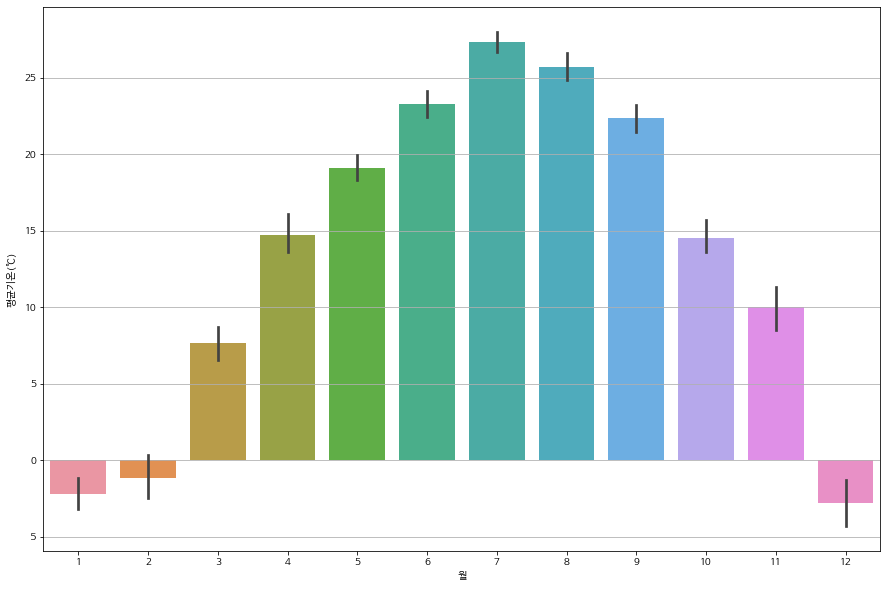

In [33]:
plt.figure(figsize=(15,10))
plt.grid()
sns.barplot(x=df['월'],y=df['평균기온(℃)'])

<AxesSubplot:xlabel='월', ylabel='이용건수'>

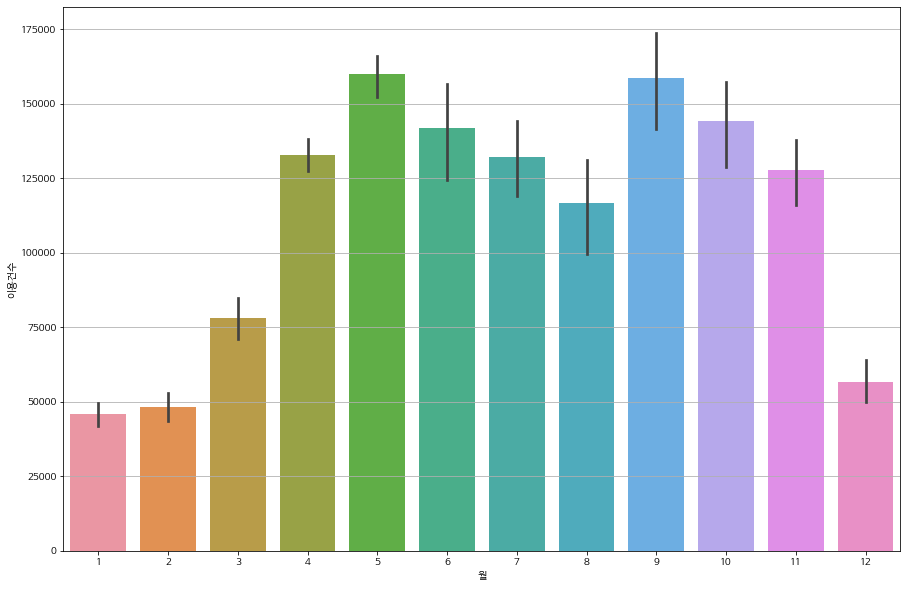

In [37]:
plt.figure(figsize=(15,10))
plt.grid()
sns.barplot(x=df['월'],y=df['이용건수'])
# 겨울에 이용건수가 적다.
# 여름엔 이용건수가 봄과 가을에 비해 적다. 
# 대여수는 5,9월달에 가장 높다. 

<AxesSubplot:xlabel='월', ylabel='이동거리(M)'>

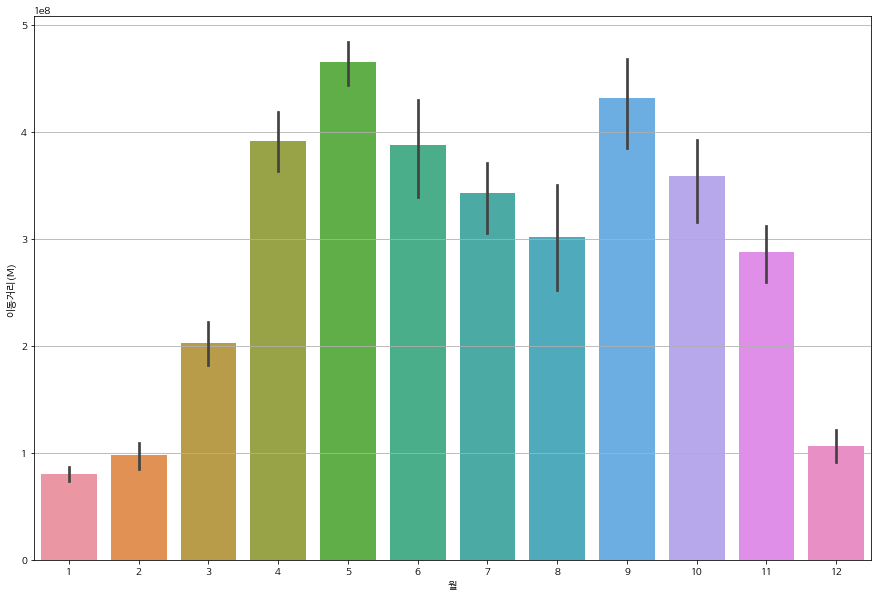

In [38]:
plt.figure(figsize=(15,10))
plt.grid()
sns.barplot(x=df['월'],y=df['이동거리(M)'])
# 이동거리도 봄, 가을인 5,9월달이 가장 많았다. 

<AxesSubplot:xlabel='월', ylabel='이용시간(분)'>

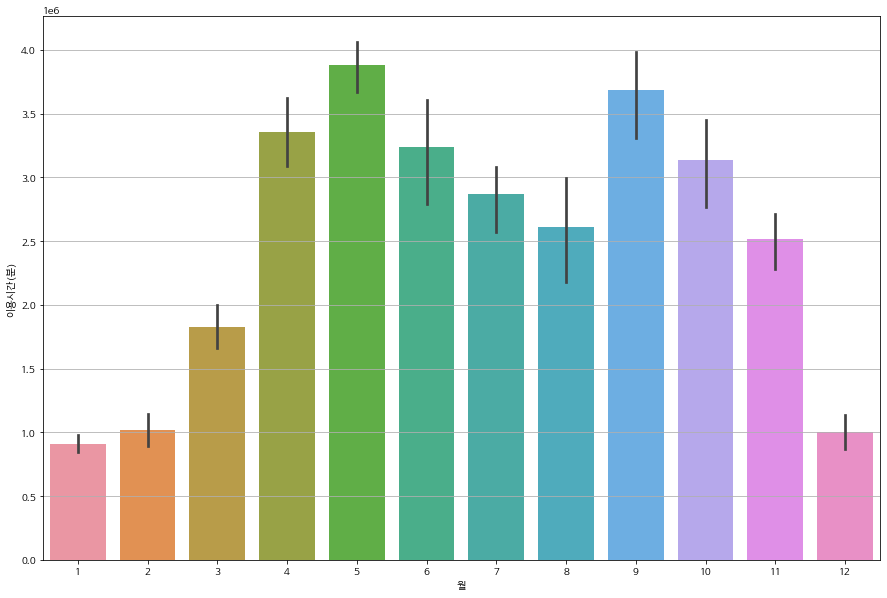

In [39]:
plt.figure(figsize=(15,10))
plt.grid()
sns.barplot(x=df['월'],y=df['이용시간(분)'])
# 이용시간도 5,9월달이 가장 많았다.